# Proyek Analisis Data : [Bike Sharing Dataset]

*   **Nama**: Febrisa Eka Nur Patricia
*   **Email** : febrisapatricia7@gmai.com
*   **ID Dicodind** :




# Menentukan Pertanyaan Bisnis


1.   Bagaimana pengaruh cuaca terhadap peminjaman sepeda?
2.   Bagaimana penggunaan sepeda antara hari kerja dan hari libur?



# Import Semua Packages/Library yang Digunakan

In [1]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 682.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.4 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency
%matplotlib inline
sns.set(style='dark')


# Data Wrangling

### Gathering Data

In [3]:
df_day = pd.read_csv("day.csv")

In [4]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [5]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Karena pada kolom dteday bertipe object maka akan diubah menjadi tipe data datetime. Selain itu, kolom weathersit dapat diubah menjadi tipe data kategorikal

In [6]:
df_day.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Tidak terdapat nilai null dalam data

In [7]:
print("Jumlah Duplikasi Data :", df_day.duplicated().sum())

Jumlah Duplikasi Data : 0


Karena pada dataset day.csv tidak terdapat missing value maka tidak perlu perilaku khusus untuk mengatasi missing value pada dataset day.csv


### Cleaning Data

In [8]:
# Merubah tipe data object menjadi tipe data datetime
datetime_columns = ["dteday"]

for column in datetime_columns:
  df_day[column] = pd.to_datetime(df_day[column])

In [9]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [10]:
# Merubah 'weathersit' menjadi kategorikal
df_day['weathersit']=df_day['weathersit'].replace([1, 2, 3, 4], ['Clear', 'Mist_Cloudy', 'Light_Snow_Rain', 'Heavy_rain'])
df_day['weathersit'].value_counts()

,count
weathersit,
Clear,463
Mist_Cloudy,247
Light_Snow_Rain,21


In [11]:
# Merubah 'Workingday' menjadi kategorikal
df_day['workingday']=df_day['workingday'].replace([0, 1], ['Hari Libur', 'Hari Kerja'])
df_day['workingday'].value_counts()

,count
workingday,
Hari Kerja,500
Hari Libur,231


# Exploratory Data Analysis (EDA)

### Explore

In [12]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,Hari Libur,Mist_Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,Hari Libur,Mist_Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,Hari Kerja,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,Hari Kerja,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,Hari Kerja,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
describe_day = df_day.describe()
describe_day

,instant,dteday,season,yr,mnth,holiday,weekday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Rata-rata jumlah penyewa pada data tersebut sebesar 4504 dengan rata-rata jumlah penyewa casual sebesar 848 dan rata-rata jumlah registered penyewa sebesar 3656

In [14]:
# Jumlah registered berdasarkan "weathersit"
weathersit_df = df_day.groupby('weathersit').agg({
    'weathersit': 'count',
    'cnt': ['sum', 'mean'],
    'casual': 'sum',
    'registered': 'sum'
})
weathersit_df.columns = ['jml_weathersit', 'total_penyewa', 'mean', 'casual', 'registered']
print(weathersit_df)



                 jml_weathersit  total_penyewa         mean  casual  \
weathersit                                                            
Clear                       463        2257952  4876.786177  446346   
Light_Snow_Rain              21          37869  1803.285714    3895   
Mist_Cloudy                 247         996858  4035.862348  169776   

                 registered  
weathersit                   
Clear               1811606  
Light_Snow_Rain       33974  
Mist_Cloudy          827082  


In [15]:
# Total penyewa berdasarkan workingday

workingday_df = df_day.groupby('workingday').agg({
    'workingday': 'count',
    'cnt': ['sum', 'mean'],
    'casual': 'sum',
    'registered': 'sum'
})
workingday_df.columns = ['jml_workingday', 'total_penyewa', 'mean', 'casual', 'registered']
print(workingday_df)


            jml_workingday  total_penyewa         mean  casual  registered
workingday                                                                
Hari Kerja             500        2292410  4584.820000  303285     1989125
Hari Libur             231        1000269  4330.168831  316732      683537


# Visualization & Explanatory Analysis

<ipython-input-16-6b8873d4b1f6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tupl

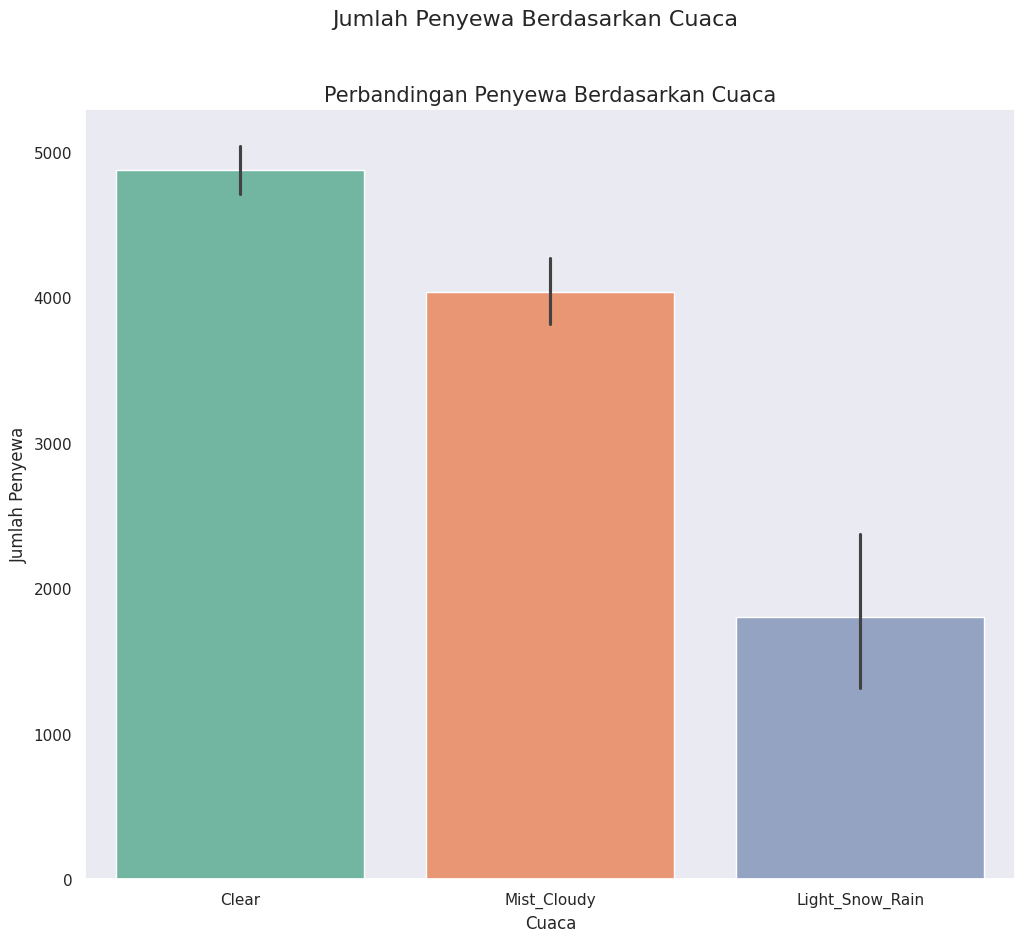

In [16]:
#Visualisasi penyewa sepeda berdasarkan "wheatersit"
fig = plt.figure(figsize=(12, 10))
plt.suptitle("Jumlah Penyewa Berdasarkan Cuaca", fontsize=16)

sns.barplot(
    y="cnt",
    x="weathersit",
    data=df_day.sort_values(by="cnt", ascending=False),
    palette="Set2"
)
plt.xlabel("Cuaca", fontsize=12)
plt.ylabel("Jumlah Penyewa", fontsize=12)
plt.title("Perbandingan Penyewa Berdasarkan Cuaca", fontsize=15)
plt.show()

<ipython-input-17-ce4b6c99039f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workingday', y='cnt', data=df_day, estimator=sum, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Figure size 1200x1000 with 0 Axes>

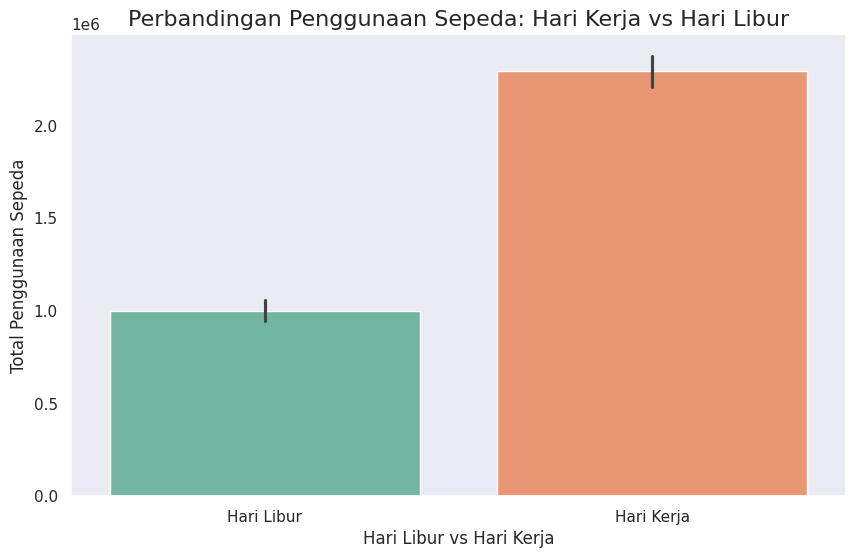

In [17]:
#Visualisasi penyewa sepeda berdasarkan "workingday"
fig = plt.figure(figsize=(12, 10))

plt.figure(figsize=(10, 6))
sns.barplot(x='workingday', y='cnt', data=df_day, estimator=sum, palette='Set2')

plt.title('Perbandingan Penggunaan Sepeda: Hari Kerja vs Hari Libur', fontsize=16)
plt.xlabel('Hari Libur vs Hari Kerja', fontsize=12)
plt.ylabel('Total Penggunaan Sepeda', fontsize=12)
plt.show()

# Conclusion

*   Pertanyaan 1 : Pada eksplor data tersebut dapat dilihat bahwa cuaca yang dirasakan dapat berpengaruh pada jumlah peminjaman sepeda baik registed, casual, maupu total seluruh peminjaman sepeda. Pada data terlihat bahwa pada cuaca cerah terdapat paling banyak peminjaman sepeda
*   Pertanyaan 2 : Pada eksplor data tersebut dapat dilihat bahwa disaat hari kerja terdapat banyak peminjam dibanding dengan hari libur.



In [18]:
df_day.to_csv('day_data.csv', index=False)